# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [82]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [83]:
df = pd.read_csv('heart_raw.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [85]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [86]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


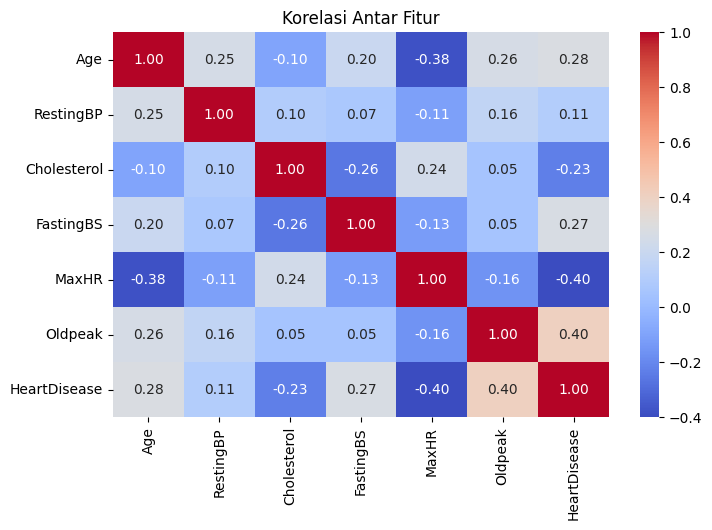

In [87]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

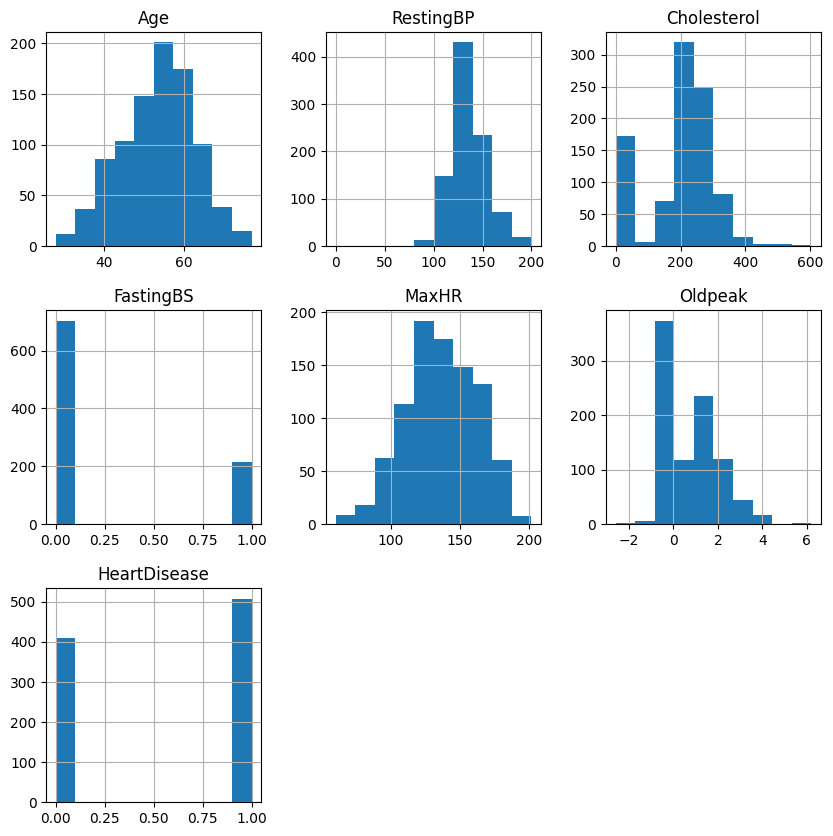

In [88]:
df[numeric_cols].hist(figsize=(10, 10))
plt.show

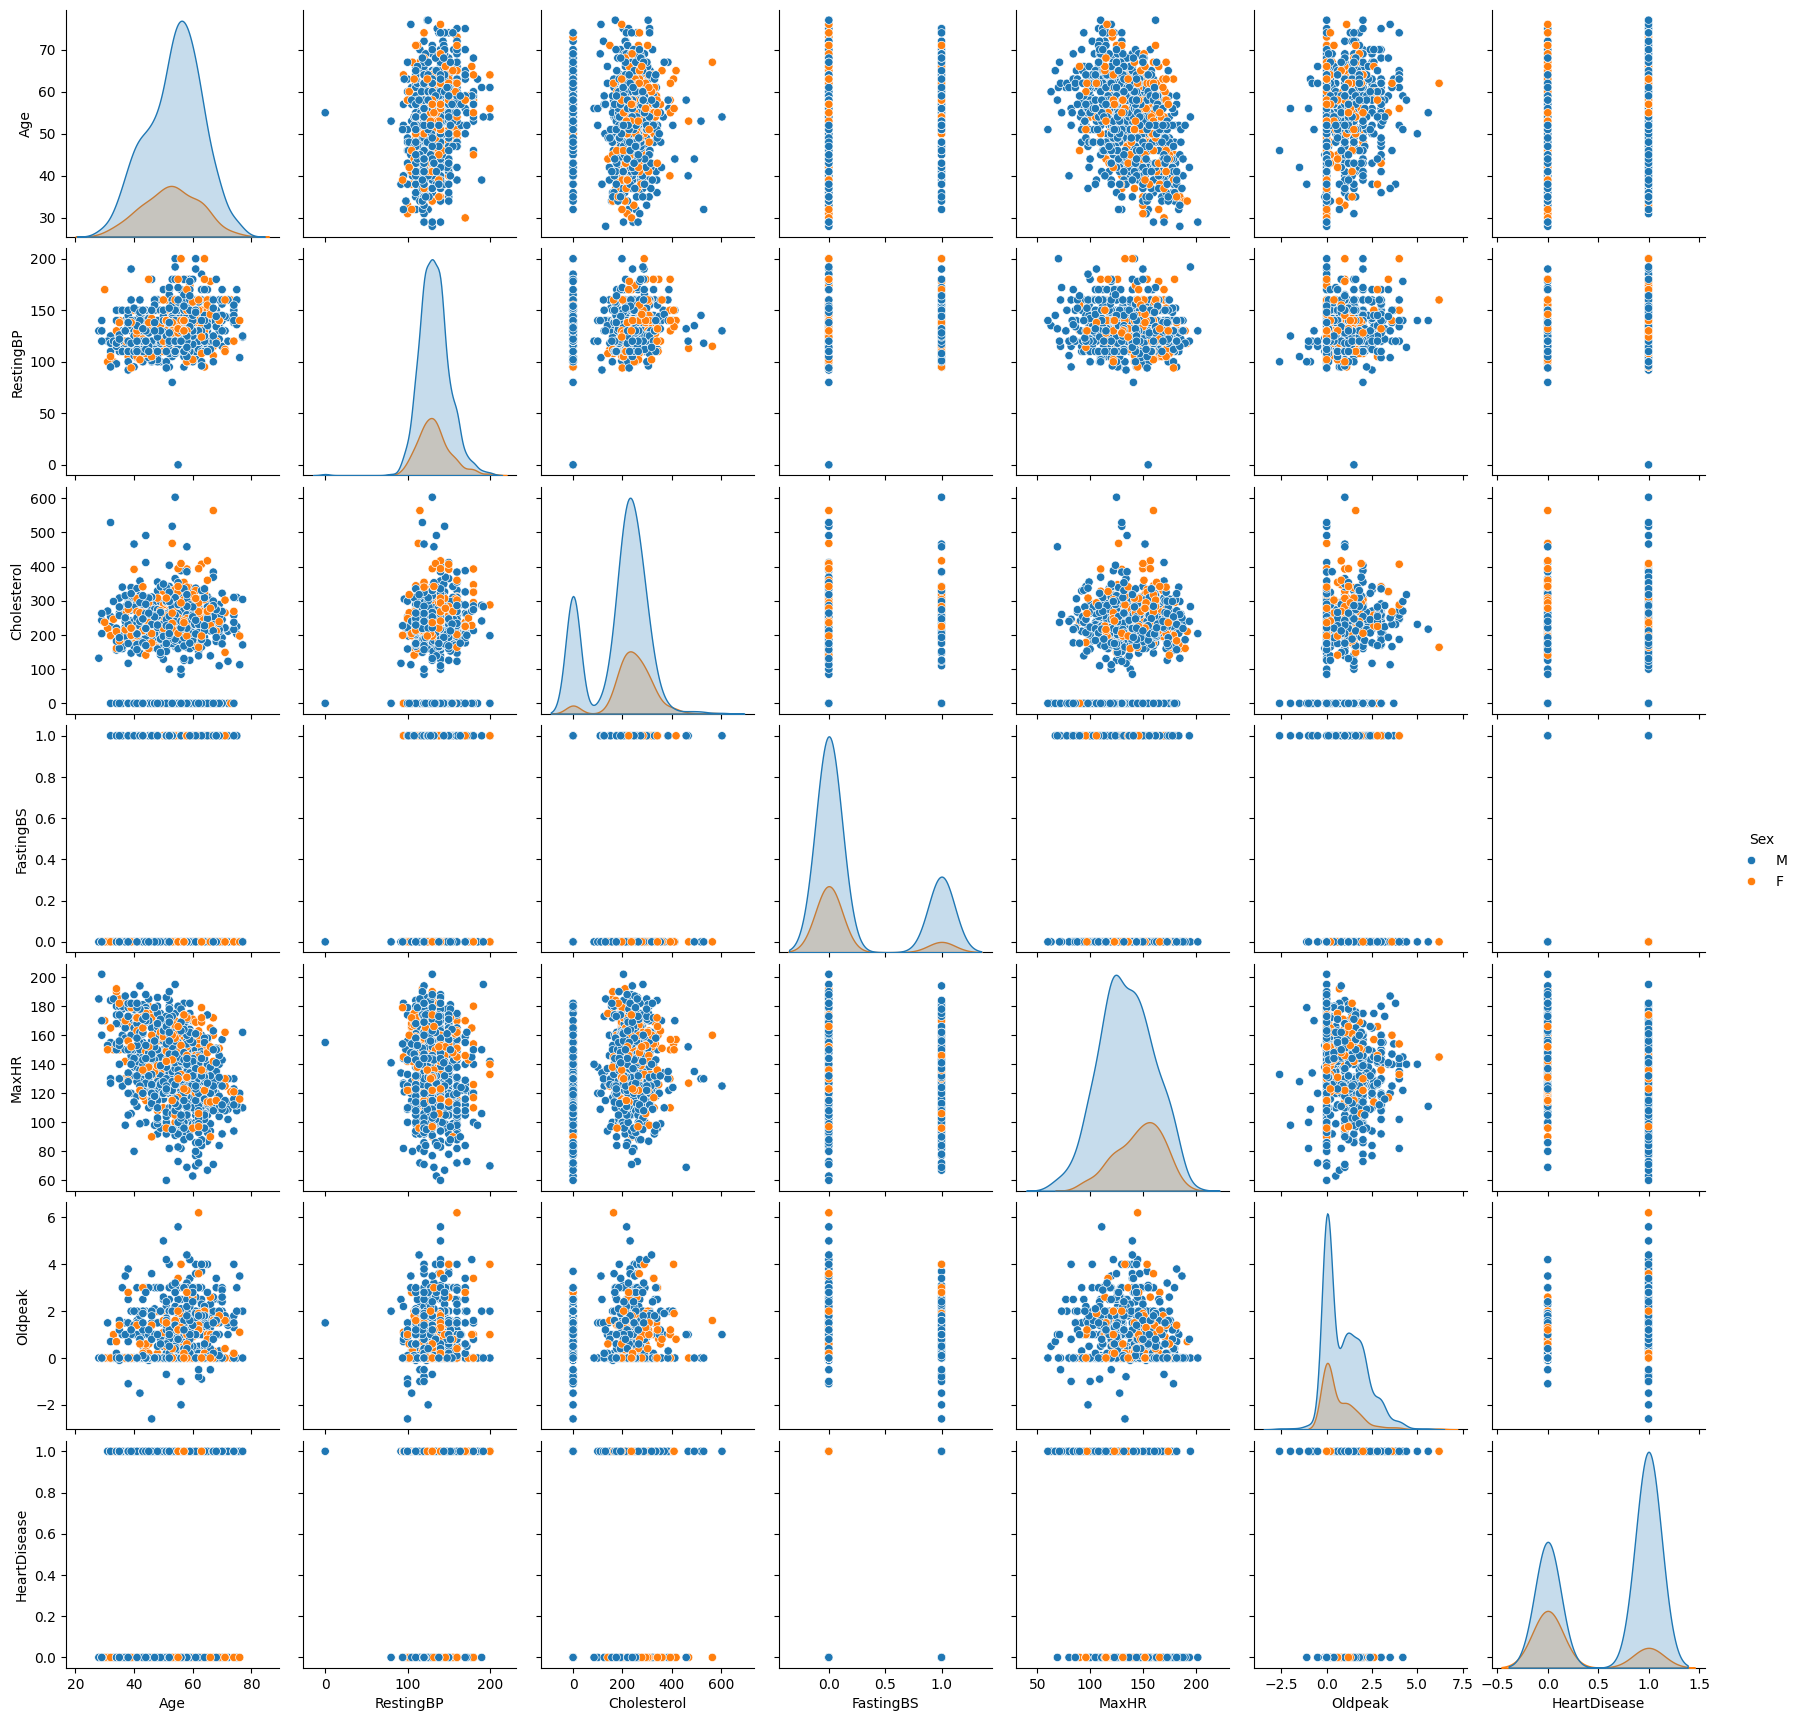

In [89]:
sns.pairplot(data=df, hue='Sex')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [91]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [92]:
df.duplicated().sum()

np.int64(0)

In [93]:
df['HeartDisease'].unique() # 0 not having heart disease, 1 having hearth disease
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [94]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [95]:
df['Sex'] = df['Sex'].str.strip().str.lower()
df['Sex']

0      m
1      f
2      m
3      f
4      m
      ..
913    m
914    m
915    m
916    f
917    m
Name: Sex, Length: 918, dtype: object

In [96]:
df['ChestPainType'] = df['ChestPainType'].str.strip().str.lower()
df['RestingECG']= df['RestingECG'].str.strip().str.lower()
df['ExerciseAngina']=df['ExerciseAngina'].str.strip().str.lower()
df['ST_Slope']=df['ST_Slope'].str.strip().str.lower()

## **Scaling**

In [97]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns]) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,m,ata,0.410909,0.825070,-0.551341,normal,1.382928,n,-0.832432,up,0
1,-0.478484,f,nap,1.491752,-0.171961,-0.551341,normal,0.754157,n,0.105664,flat,1
2,-1.751359,m,ata,-0.129513,0.770188,-0.551341,st,-1.525138,n,-0.832432,up,0
3,-0.584556,f,asy,0.302825,0.139040,-0.551341,normal,-1.132156,y,0.574711,flat,1
4,0.051881,m,nap,0.951331,-0.034755,-0.551341,normal,-0.581981,n,-0.832432,up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,m,ta,-1.210356,0.596393,-0.551341,normal,-0.188999,n,0.293283,flat,1
914,1.536902,m,asy,0.627078,-0.053049,1.813758,normal,0.164684,n,2.357094,flat,1
915,0.370100,m,asy,-0.129513,-0.620168,-0.551341,normal,-0.857069,y,0.293283,flat,1
916,0.370100,f,ata,-0.129513,0.340275,-0.551341,lvh,1.461525,n,-0.832432,flat,1


## **Label Encoding**

In [98]:
df["Sex"] = df["Sex"].map({"m": 1, "f": 0})
df["ExerciseAngina"] = df["ExerciseAngina"].map({"y": 1, "n": 0})


In [100]:
cat_cols = ["ChestPainType", "RestingECG", "ST_Slope"]

df_encoded = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True
)


In [102]:
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ata,ChestPainType_nap,ChestPainType_ta,RestingECG_normal,RestingECG_st,ST_Slope_flat,ST_Slope_up
0,-1.433140,1,0.410909,0.825070,-0.551341,1.382928,0,-0.832432,0,True,False,False,True,False,False,True
1,-0.478484,0,1.491752,-0.171961,-0.551341,0.754157,0,0.105664,1,False,True,False,True,False,True,False
2,-1.751359,1,-0.129513,0.770188,-0.551341,-1.525138,0,-0.832432,0,True,False,False,False,True,False,True
3,-0.584556,0,0.302825,0.139040,-0.551341,-1.132156,1,0.574711,1,False,False,False,True,False,True,False
4,0.051881,1,0.951331,-0.034755,-0.551341,-0.581981,0,-0.832432,0,False,True,False,True,False,False,True
